# 第8章 深層学習による画像認識とその仕組みを知ろう

ここでは、深層学習を学ぶうえで必要なプログラムを実行していく流れを学んでいきます。  

※エラーが出る場合は、Clear Output を行うことで正常に動く場合があります。

In [ ]:
#ライブラリの設定
!pip install -q -r ./requirements.txt

## 8-1 深層学習って何ができるの？

### 画像読み込み

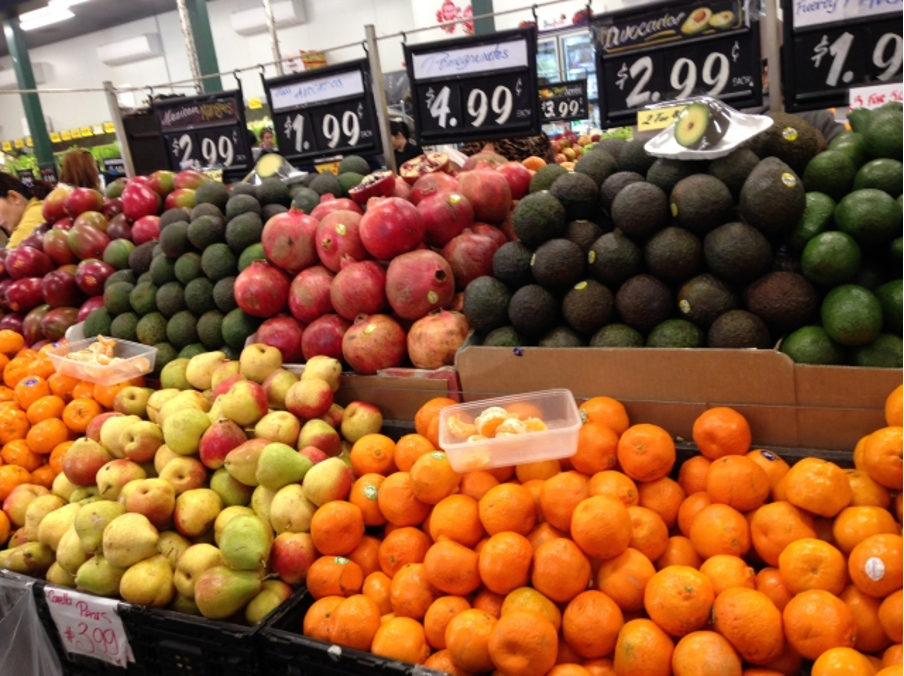

In [1]:
from PIL import Image

# 画像読み込み
filename = "vegi.png"
im = Image.open(filename)

# 表示
im

### 物体認識

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

# 学習済みのVGG16をロード
model = VGG16(weights='imagenet')

# 画像ファイル読み込み(224x224にリサイズ)
img = image.load_img(filename, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# 上位5位までのクラスを予測する
preds = model.predict(preprocess_input(x))
results = decode_predictions(preds, top=5)[0]
for result in results:
    print(result[1],result[2])

ModuleNotFoundError: No module named 'tensorflow'

## 8-3 深層学習の「学習」はどうやって進むの？

### データ読み込み

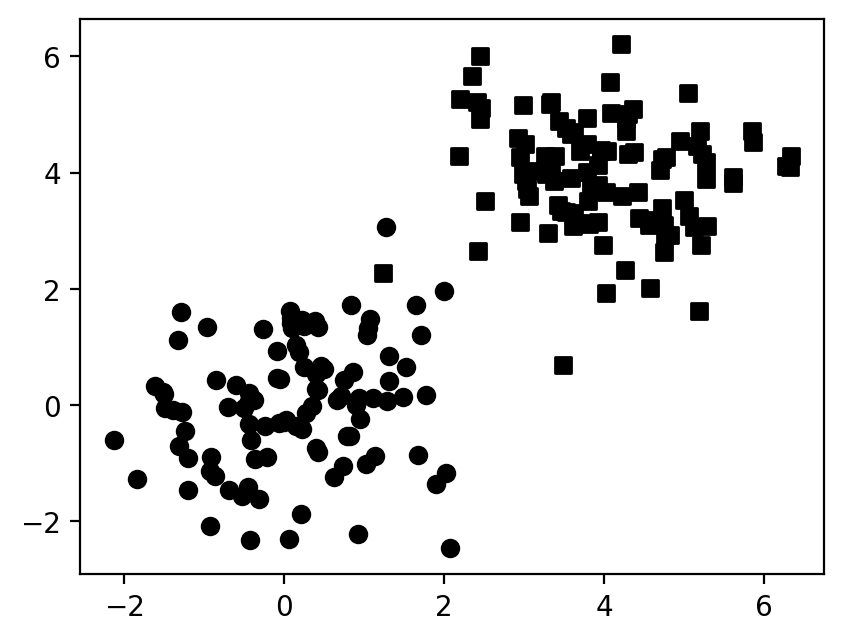

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# データ読み込み
df_sample = pd.read_csv("sample_2d.csv")
sample = df_sample.values

# 読み込みデータ可視化
for i in range(len(sample)):
    if int(sample[i][2])==0:
        plt.scatter(sample[i][0],sample[i][1],marker="o",color="k")
    else:
        plt.scatter(sample[i][0],sample[i][1],marker="s",color="k")
plt.show()
%matplotlib inline

### Kerasによる分類

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# パラメータ設定
num_epochs = 1

# モデル作成
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=2))
model.add(Dense(32, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
 
# トレーニング（分類）
data = sample[:,0:2]
labels = sample[:,2].reshape(-1, 1)
model.fit(data, labels, epochs=num_epochs, batch_size=10)
 
# 分類結果出力
predicted_classes = model.predict_classes(data, batch_size=10)

# 分類結果可視化
for i in range(len(sample)):
    # 分類結果を色で表示
    if int(predicted_classes[i])==0:
        target_color = "r"
    else:
        target_color = "b"
    # 実際のクラスをマーカーで表示
    if int(sample[i][2])==0:
        target_marker = "o"
    else:
        target_marker = "s"
    plt.scatter(sample[i][0],sample[i][1],marker=target_marker,color=target_color)
plt.show()
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

## 8-4 深層学習ライブラリを使って直線グラフを予測してみよう

### データ読み込み

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# データ読み込み
df_sample = pd.read_csv("sample_linear.csv")
sample = df_sample.values

# 読み込みデータ可視化
x = sample[:,0]
y = sample[:,1]
plt.scatter(x,y,marker=".",color="k")
plt.show()
%matplotlib inline

### Kerasによる直線近似

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# パラメータ設定
num_epochs = 1

# モデル作成
model = Sequential()
model.add(Dense(20, activation="tanh", input_dim=1))
model.add(Dense(20, activation="tanh"))
model.add(Dense(1))
model.add(Dense(1, input_dim=1))

# 最適化計算
model.compile(optimizer='sgd',
              loss='mean_squared_error')

# トレーニング(曲線近似)
model.fit(x, y,batch_size=100,epochs=num_epochs)

# 予測結果出力
pred = model.predict(x)

# 予測結果可視化
plt.plot(x, y, color="k")
plt.plot(x, pred, color="r")
plt.show()

## 8-5 深層学習ライブラリを使って曲線グラフを予測してみよう

### データ読み込み

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# データ読み込み
df_sample = pd.read_csv("sample_sin.csv")
sample = df_sample.values

# 読み込みデータ可視化
x = sample[:,0]
y = sample[:,1]
plt.scatter(x,y,marker=".",color="k")
plt.show()
%matplotlib inline

### Kerasによる曲線近似

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# パラメータ設定
num_epochs = 1

# モデル作成
model = Sequential()
model.add(Dense(20, activation="tanh", input_dim=1))
model.add(Dense(20, activation="tanh"))
model.add(Dense(1))
model.add(Dense(1, input_dim=1))

# 最適化計算
model.compile(optimizer='sgd',
              loss='mean_squared_error')

# トレーニング(曲線近似)
model.fit(x, y,batch_size=100,epochs=num_epochs)

# 予測結果出力
pred = model.predict(x)

# 予測結果可視化
plt.plot(x, y, color="k")
plt.plot(x, pred, color="r")
plt.show()